# Relate X with future price

# Load

In [ ]:

import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
from typing import *

from src.sim import simulate_future_curve_data, plot_grid_by_taxonomy



XTUDAO = Path("data/01--grouped/X_tudao.parquet")
future = Path("data/00--raw/future_price.csv")

X = pd.read_parquet(XTUDAO)
y = pd.read_csv(future)


print(X.head(10).to_markdown())
print()
print(y.head(10).to_markdown())


| date                | contratos__boi_gordo_b3_pregão_regular_-_contract_month   | contratos__boi_gordo_b3_pregão_regular_-_indicator_name   |   contratos__boi_gordo_b3_pregão_regular_-_price |   contratos__boi_gordo_b3_pregão_regular_-_variation | indicadores__bezerro_esalqbmf_bovespa_ms_-_indicator_name   |   indicadores__bezerro_esalqbmf_bovespa_ms_-_price_brl | indicadores__bezerro_esalqbmf_bovespa_ms_-_price_usd   |   indicadores__bezerro_esalqbmf_bovespa_ms_-_variation_pct | indicadores__boi_gordo_média_sp_a_prazo_-_indicator_name   |   indicadores__boi_gordo_média_sp_a_prazo_-_price_brl | indicadores__boi_gordo_média_sp_a_prazo_-_price_usd   |   indicadores__boi_gordo_média_sp_a_prazo_-_variation_pct | indicadores__boi_à_vista_imea_-_indicator_name   |   indicadores__boi_à_vista_imea_-_price_brl | indicadores__boi_à_vista_imea_-_price_usd   | indicadores__boi_à_vista_imea_-_state   |   indicadores__boi_à_vista_imea_-_variation_pct | indicadores__indicador_da_novilha_-_indicator

/tmp/ipykernel_33737/626126514.py:15: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272) have mixed types. Spec

date
2010-01-01    0.000000
2010-01-02    0.000000
2010-01-03    0.000000
2010-01-04    0.058824
2010-01-05    0.058824
                ...   
2025-12-27    0.000000
2025-12-28    0.000000
2025-12-29    0.000000
2025-12-30    0.000000
2025-12-31    0.000000
Length: 5844, dtype: float64


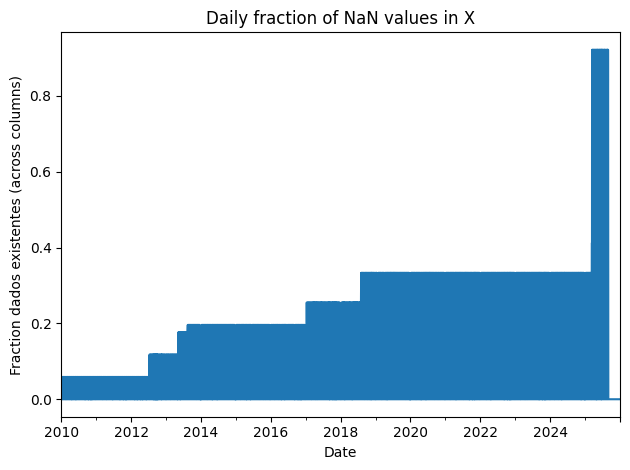

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

X.index = pd.to_datetime(X.index, errors="coerce")

daily_nan_frac = 1 - X.isnull().mean(axis=1)

print(daily_nan_frac)

plt.figure()
daily_nan_frac.plot()
plt.title("Daily fraction of NaN values in X")
plt.xlabel("Date")
plt.ylabel("Fraction dados existentes (across columns)")
plt.tight_layout()

# Linear

## L1: Lag–Horizon CCF with AR prewhitening

In [3]:
from src.metrics.l1_lag_horizon import *


fig, _ = plot_grid_by_taxonomy(
    X.columns,
    plot_fn=l1_plot_panel,
    grouping=("family",),                  # rows = family
    order_within=("target","sign","strength","lag"),
    max_cols=4,
    figsize_per_cell=(3.1, 2.5),
    title="L1: Lag–Horizon CCF (prewhitened) — grouped by family",
    colorbar_policy="group_right",
    plot_fn_kwargs=dict(X=X, Y=Y, max_lag=30, ar_maxlag=12, vmin=-1, vmax=1),
    families_order=["LIN","LAG","MON","NMON","INT","REG","VOL","SEAS","COL","HUM","NULL"],
)
plt.show()


ModuleNotFoundError: No module named 'statsmodels'

## L2: Nelson–Siegel curve factors (Level/Slope/Curvature)

In [ ]:
from src.metrics.l2_nelson_siegel import *

if __name__ == "__main__":
    res_ns = l2_ns_factors(Y=Y, x=x, lags=range(0,15), lam=None)
    l2_ns_report(res_ns)


    fig, _ = plot_grid_by_taxonomy(
        X.columns,
        plot_fn=l2_plot_corr_heatmap,
        grouping=("family",),   # rows by family
        max_cols=3,
        figsize_per_cell=(3.0, 2.4),
        title="L2: Corr(x_{t-ℓ}, NS factors)",
        colorbar_policy="group_right",
        plot_fn_kwargs=dict(X=X, Y=Y, lags=range(0,15), vmin=-1, vmax=1, cmap="coolwarm"),
        families_order=["LIN","LAG","MON","NMON","INT","REG","VOL","SEAS","COL","HUM","NULL"],
    )
    plt.show()


## L3: Partial Least Squares (PLS) — Window of X vs Full Future Curve Y

In [ ]:

from src.metrics.l3_pls import *



fig, _ = plot_grid_by_taxonomy(
    X.columns,
    plot_fn=l3_pls1_panel,
    grouping=("family",),
    max_cols=3,
    figsize_per_cell=(3.0, 2.5),
    title="L3-simplified: PLS1 (feature window → curve)",
    colorbar_policy="group_right",
    plot_fn_kwargs=dict(X=X, Y=Y, window=24, n_components=1, scale=True, cmap="coolwarm"),
    families_order=["LIN","LAG","MON","NMON","INT","REG","VOL","SEAS","COL","HUM","NULL"],
)
plt.show()


# Nonlinear

## N1: Distance Correlation (dCor) — Windowed Drivers vs Future Curve

In [ ]:
from src.metrics.n1_dcor import *

collection = n2_marginal_all_features(
    X, Y, window=10, max_samples=1500, random_state=0, compute_dtype="float32"
)

fig, _ = plot_grid_by_taxonomy(
    X.columns,
    plot_fn=n2_plot_panel,
    grouping=("family",),                 # rows = family (yours)
    order_within=("target","sign","strength","lag"),
    max_cols=4,
    figsize_per_cell=(3.1, 2.5),
    title=f"N2: Marginal dCor (stand-alone per feature) — window={collection.window}",
    colorbar_policy=None,
    plot_fn_kwargs=dict(
        collection=collection,
        kind="line",
        y_min=0.0,
        y_max=None,
        show_max_label=True,
        title_prefix=None
    ),
    families_order=["LIN","LAG","MON","NMON","INT","REG","VOL","SEAS","COL","HUM","NULL"],
)
plt.show()


## N2: MIC (Maximal Information Coefficient), per (lag, horizon)

In [ ]:

from src.metrics.n2_mic import *


# Distributional

## D1: Energy Distance (High vs Low regimes of x)

In [ ]:


from src.metrics.d1_energy_dis import *


## D2: Sliced Wasserstein Distance (High vs Low regimes of x)

In [ ]:


from src.metrics.d1_energy_dis import *